### 정상성

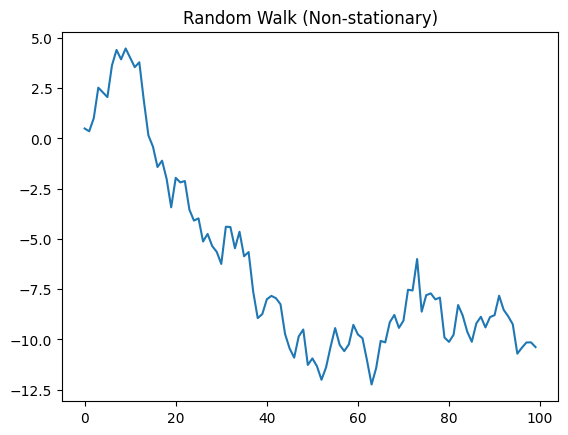

ADF Statistic: -1.3583317659818985
p-value: 0.6020814791099101
Used Lag: 0
Number of Observations Used: 99
Critical Values:
   1%: -3.498198082189098
   5%: -2.891208211860468
   10%: -2.5825959973472097
Regression Type (Used for the test): c (constant only, default)


In [22]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt

# sample 생성(무작위)
np.random.seed(42)
data = np.random.randn(100).cumsum()

# 데이터 그래프
plt.plot(data)
plt.title('Random Walk (Non-stationary)')
plt.show()

# ADF Test
result = adfuller(data)

# 결과 출력
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Used Lag: {result[2]}')
print(f'Number of Observations Used: {result[3]}')
print(f'Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')
print(f'Regression Type (Used for the test): c (constant only, default)')


### 차분

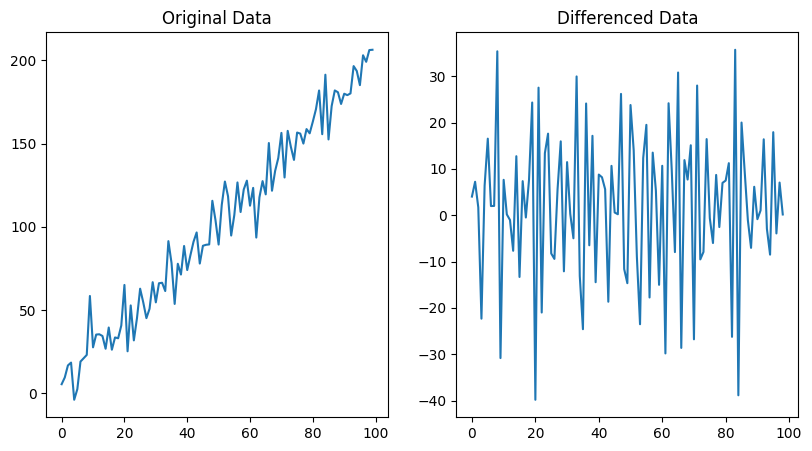

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 원본 데이터
data = np.arange(1, 101) * 2 + np.random.randn(100) * 10

# 1차 차분
differenced_data = np.diff(data, n=1)

plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(data)
plt.title('Original Data')

plt.subplot(1, 3, 2)
plt.plot(differenced_data)
plt.title('Differenced Data')

plt.show()

### 로그

C:\Users\이동현\AppData\Local\Temp\ipykernel_8632\3177054633.py:10: RuntimeWarning: invalid value encountered in log
  log_transformed_data = np.log(data)


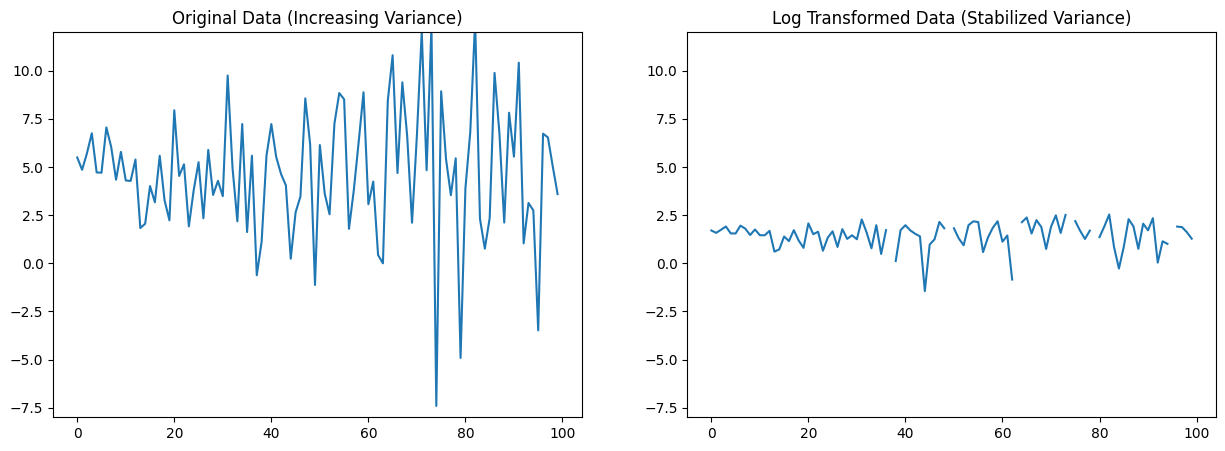

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 원본 데이터 생성 (분산이 시간에 따라 증가)
np.random.seed(42)
time = np.linspace(0, 10, 100)
data = np.random.randn(100) * (0.5 * time + 1) + 5

# 로그 변환
log_transformed_data = np.log(data)

plt.figure(figsize=(15,5))

# 원본 데이터 그래프
plt.subplot(1, 2, 1)
plt.plot(data)
plt.title('Original Data (Increasing Variance)')
plt.ylim(-8, 12)

# 로그 변환된 데이터 그래프
plt.subplot(1, 2, 2)
plt.plot(log_transformed_data)
plt.title('Log Transformed Data (Stabilized Variance)')
plt.ylim(-8, 12)

plt.show()

### 정규성

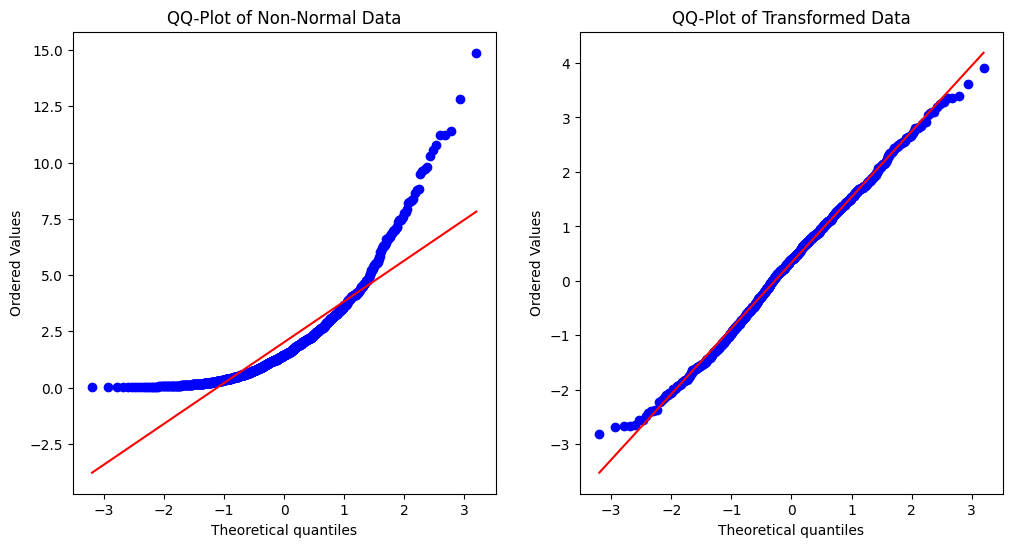

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 비정규분포 데이터 생성
data_non_normal = np.random.exponential(scale=2, size=1000)

# Box-Cox 변환 적용
transformed_data, _ = stats.boxcox(data_non_normal)

# QQ-Plot으로 원본 데이터와 변환된 데이터 비교
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
stats.probplot(data_non_normal, dist="norm", plot=plt)
plt.title('QQ-Plot of Non-Normal Data')

plt.subplot(1, 2, 2)
stats.probplot(transformed_data, dist="norm", plot=plt)
plt.title('QQ-Plot of Transformed Data')

plt.show()


In [25]:
stats.boxcox(data_non_normal)[1] # lambda

0.25927070696601884

### 자기상관

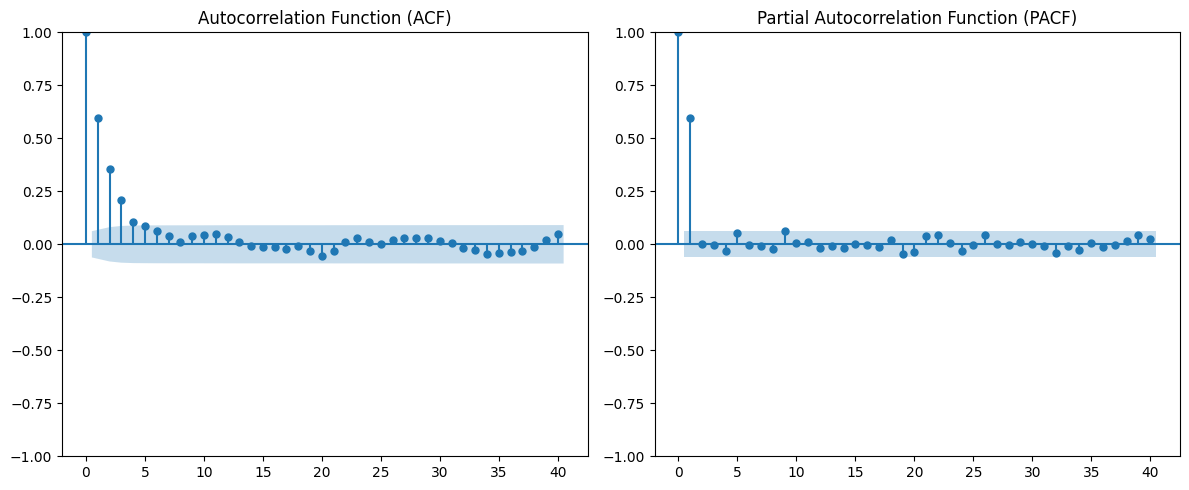

Ljung-Box statistic: lb_stat, p-value: lb_pvalue


In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

# 임의의 AR(1) 시계열 데이터 생성
np.random.seed(42)
data = [np.random.randn()]
for i in range(1, 1000):
    data.append(0.6 * data[-1] + np.random.randn())
data = np.array(data)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF 그리기
plot_acf(data, lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')

# PACF 그리기
plot_pacf(data, lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

# 융-박스 검정
lb_stat, lb_p_value = acorr_ljungbox(data, lags=[10])
print(f"Ljung-Box statistic: {lb_stat}, p-value: {lb_p_value}")


In [21]:
acorr_ljungbox(data, lags=[10])

,lb_stat,lb_pvalue
10,551.367142,4.569860e-112


### 계절성

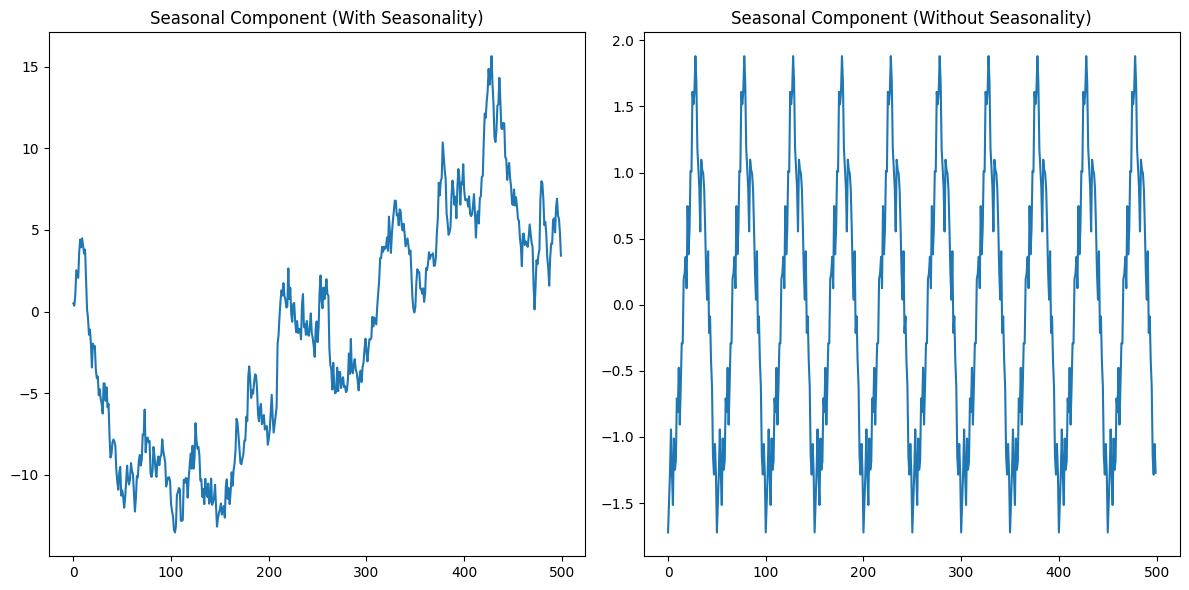

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 계절성이 없는 시계열 데이터 생성 (예: 랜덤 워크)
np.random.seed(42)
non_seasonal_data = np.cumsum(np.random.normal(scale=1, size=500))

# 계절성 분해
result_non_seasonal = seasonal_decompose(non_seasonal_data, model='additive', period=50)

plt.figure(figsize=(12, 6))

# 계절성이 있는 데이터의 계절 성분 그리기
plt.subplot(1, 2, 1)
plt.plot(non_seasonal_data)
plt.title('Seasonal Component (With Seasonality)')

# 계절성이 없는 데이터의 계절 성분 그리기
plt.subplot(1, 2, 2)
plt.plot(result_non_seasonal.seasonal)
plt.title('Seasonal Component (Without Seasonality)')

plt.tight_layout()
plt.show()

### 등분산성

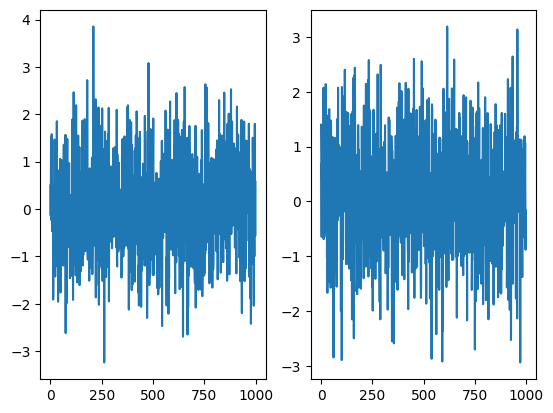

Bartlett Test: statistic = 0.34002826698353783, p-value = 0.5598129061342484
Levene Test: statistic = 0.16575791865118406, p-value = 0.6839533428776543


In [32]:
from scipy.stats import bartlett, levene
import matplotlib.pyplot as plt

# 임의의 등분산성을 가진 데이터 생성
np.random.seed(42)
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(0, 1, 1000)

# 시각화
plt.subplot(1,2,1)
plt.plot(data1)

plt.subplot(1,2,2)
plt.plot(data2)

plt.show()

# Bartlett 검정
bartlett_stat, bartlett_p_value = bartlett(data1, data2)
print(f"Bartlett Test: statistic = {bartlett_stat}, p-value = {bartlett_p_value}")

# Levene 검정
levene_stat, levene_p_value = levene(data1, data2)
print(f"Levene Test: statistic = {levene_stat}, p-value = {levene_p_value}")


### 독립성

In [34]:
import numpy as np
from statsmodels.stats.stattools import durbin_watson

# 임의의 잔차 데이터 생성
np.random.seed(42)
residuals = np.random.randn(100)

# Durbin-Watson 통계량 계산
dw_stat = durbin_watson(residuals)

print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 2.0118176103841634
